# Use data from the previous stages (Refer to file 001 and 002)
### Using two algorithms to make the predictions

In [1]:
import pandas as pd 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# Suppress the warnings
warnings.filterwarnings('ignore')

In [3]:
# Read Data from stage 2
data = pd.read_csv("./data/data_pre.csv",index_col=0)

In [4]:
data.head()

date        fullVisitorId     visitId  visitNumber  visitStartTime  \
0  2017-10-16  9549826748224805897  1508200705            4      1508200705   
1  2017-10-16  3700714855829972615  1508192636           11      1508192636   
2  2017-10-16  1572225825161580042  1508162218            6      1508162218   
3  2017-10-16  7187192533100162289  1508189401           17      1508189401   
4  2017-10-16  7889233516776348524  1508190484            1      1508190484   

   totals.hits  totals.newVisits  totals.pageviews  totals.sessionQualityDim  \
0            9               0.0                 9                      13.0   
1           15               0.0                12                      38.0   
2           15               0.0                15                      42.0   
3           18               0.0                16                      77.0   
4           21               1.0                20                      62.0   

   totals.timeOnSite  totals.totalTransactionRevenue  \
0              261.0                        17190000   
1              285.0                        13000000   
2             1044.0                        65300000   
3              514.0                        25230000   
4              487.0                        16310000   

   totals.transactionRevenue  totals.transactions  \
0                   15190000                    1   
1                    8000000                    1   
2                   57300000                    1   
3                   18230000                    1   
4                   12310000                    1   

   trafficSource.adwordsClickInfo.page  trafficSource.campaignCode  \
0                                  0.0                         0.0   
1                                  0.0                         0.0   
2                                  0.0                         0.0   
3                                  0.0                         0.0   
4                                  0.0                         0.0   

   channelGrouping_(Other)  channelGrouping_Affiliates  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   channelGrouping_Direct  channelGrouping_Display  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

   channelGrouping_Organic Search  channelGrouping_Paid Search  \
0                               1                            0   
1                               0                            0   
2                               1                            0   
3                               0                            0   
4                               0                            0   

   channelGrouping_Referral  channelGrouping_Social  \
0                         0                       0   
1                         1                       0   
2                         0                       0   
3                         1                       0   
4                         1                       0   

   device.browser_Amazon Silk  device.browser_Android Webview  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   

   device.browser_Chrome  device.browser_Edge  device.browser_Firefox  \
0                      1                    0                       0   
1                      1             

In [5]:
# Actual revenue is given by the formula (log(transactionRevenue+1))
data['logRevenue'] = np.log(data['totals.transactionRevenue']+1)

In [6]:
data['logRevenue'].describe()

count    18514.000000
mean        17.770575
std          1.186022
min          9.210440
25%         16.953935
50%         17.645455
75%         18.420681
max         23.864375
Name: logRevenue, dtype: float64

In [7]:
X = data.copy()
X.drop(['totals.transactionRevenue','date','logRevenue','totals.totalTransactionRevenue','fullVisitorId','visitId','visitStartTime'],axis=1,inplace=True)
y = data['logRevenue']

In [8]:
X.head()

visitNumber  totals.hits  totals.newVisits  totals.pageviews  \
0            4            9               0.0                 9   
1           11           15               0.0                12   
2            6           15               0.0                15   
3           17           18               0.0                16   
4            1           21               1.0                20   

   totals.sessionQualityDim  totals.timeOnSite  totals.transactions  \
0                      13.0              261.0                    1   
1                      38.0              285.0                    1   
2                      42.0             1044.0                    1   
3                      77.0              514.0                    1   
4                      62.0              487.0                    1   

   trafficSource.adwordsClickInfo.page  trafficSource.campaignCode  \
0                                  0.0                         0.0   
1                                  0.0                         0.0   
2                                  0.0                         0.0   
3                                  0.0                         0.0   
4                                  0.0                         0.0   

   channelGrouping_(Other)  channelGrouping_Affiliates  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   channelGrouping_Direct  channelGrouping_Display  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

   channelGrouping_Organic Search  channelGrouping_Paid Search  \
0                               1                            0   
1                               0                            0   
2                               1                            0   
3                               0                            0   
4                               0                            0   

   channelGrouping_Referral  channelGrouping_Social  \
0                         0                       0   
1                         1                       0   
2                         0                       0   
3                         1                       0   
4                         1                       0   

   device.browser_Amazon Silk  device.browser_Android Webview  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   

   device.browser_Chrome  device.browser_Edge  device.browser_Firefox  \
0                      1                    0                       0   
1                      1                    0                       0   
2                      0                    0                       0   
3                      1                    0                       0   
4                      1                    0                       0   

   device.browser_Internet Explorer  device.browser_Opera  \
0                                 0                     0   
1                                 0                     0   
2                                 0                     0   
3                                 0                     0   
4                                 0                     0   

   device.browser_Safari  device.browser_Safari (in-app)  \
0                      0                               0   
1                      0         

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

# Using Random Forest

In [10]:
rf = RandomForestRegressor(n_jobs=-1)

In [11]:
param = {'max_depth':[5,10,20],
        'n_estimators' : [20,50,100,200]}

In [12]:
rf_cv = GridSearchCV(rf,param,cv=10,verbose=True,scoring='neg_mean_squared_error',n_jobs=-1)

rf_cv.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 15.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5, 10, 20], 'n_estimators': [20, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=True)

In [ ]:
rf_cv.cv_results_

In [13]:
best_model = rf_cv.best_estimator_
print(best_model)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [14]:
predicted_train = best_model.predict(X_train)
best_model.score(X_train,y_train)

0.7266703157981313

In [15]:
rmse_train = np.sqrt(mean_squared_error(y_train, predicted_train))
print("RMSE: %f" % (rmse_train))

RMSE: 0.622636


In [16]:
predicted_test = best_model.predict(X_test)

In [17]:
rmse_test = np.sqrt(mean_squared_error(y_test, predicted_test))
print("RMSE: %f" % (rmse_test))

RMSE: 1.056222


In [18]:
predicted_vs_actual = pd.DataFrame(y_test)
predicted_vs_actual.columns = ['Actual']
predicted_vs_actual['Predicted'] = np.array(predicted_test)
predicted_vs_actual.head()


,Actual,Predicted
15210,16.648136,16.958704
8908,18.635147,18.019150
722,20.044100,18.072322
18007,17.341283,16.836052
914,17.758257,18.035065


In [19]:
predicted_vs_actual_plot = predicted_vs_actual.sort_index(ascending=1).head(50)

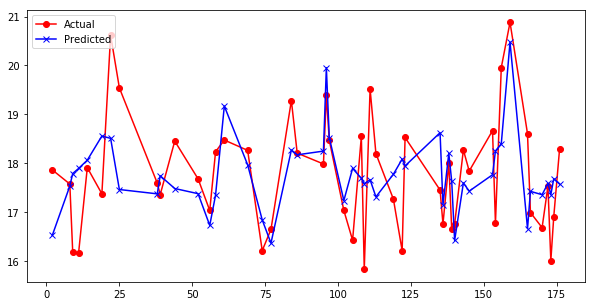

In [20]:
plt.plot(predicted_vs_actual_plot['Actual'],color='r',marker='o',label='Actual')
plt.plot(predicted_vs_actual_plot['Predicted'],color='b',marker='x',label='Predicted')
plt.legend(loc="upper left")

fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.savefig("Actual_vs_Predicted.png")

In [46]:
feature_importances = pd.DataFrame(best_model.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=True)
feature_importances_plot = feature_importances.tail(5)

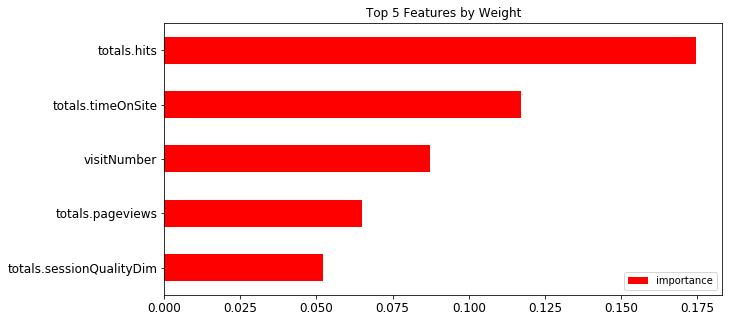

In [47]:
feature_importances_plot.plot(kind='barh', title ="V comp",figsize=(10,5),legend=True, fontsize=12, color='red',sort_columns=False)
plt.title("Top 5 Features by Weight")
plt.savefig("Top 5 Features.png")

# Use XGBoost

In [31]:
from xgboost.sklearn import XGBRegressor

In [32]:
xg_reg = XGBRegressor(objective ='reg:linear',colsample_bytree = 0.3,learning_rate = 0.1)

In [33]:
param = {'n_estimators' : [20,50,100],        
         'max_depth':[5,10,15,20]
        }

In [34]:
xgb_cv = GridSearchCV(xg_reg,param,cv=10,verbose=True,scoring='neg_mean_squared_error',n_jobs=-1)

xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 28.9min finished


[07:17:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [20, 50, 100], 'max_depth': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=True)

In [35]:
preds = xgb_cv.predict(X_test)

In [36]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1.051462


In [ ]:
xg_reg = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10,alpha=10,n_estimators = 100)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))